In [44]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

In [45]:
threshold_values = {}
h = [1]

In [46]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
    plt.show()
    return y

In [47]:
def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y

In [48]:
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
            cnt += h[i]
    return cnt

In [49]:
def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w

In [50]:
def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    return m/float(w)

In [51]:
def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v

In [52]:
def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w

In [53]:
def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print ('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]

In [54]:
image = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
img = np.asarray(image)

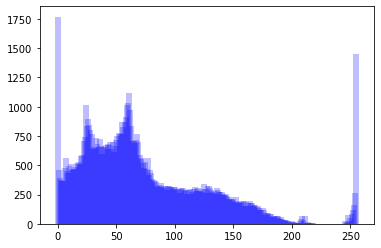

In [55]:
h = Hist(img)
threshold(h)

In [56]:
op_thres = get_optimal_threshold()

optimal threshold 97


In [57]:
res = regenerate_img(img, op_thres)

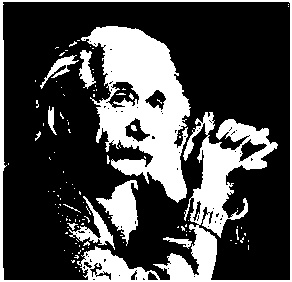

In [66]:
cv2.imwrite("f_OTSU_test_threshold.jpg",res)
Image(filename='f_OTSU_test_threshold.jpg')

-------------------------------------------------------------------------------------------------------------------------------

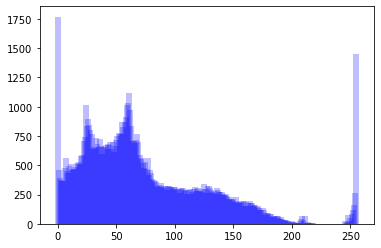

optimal threshold 97


In [67]:
f_binary = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
K_binary = f_binary.max()
x,y = f_binary.shape
f_binary_array = np.asarray(f_binary)
h_binary = Hist(f_binary_array)
threshold(h_binary)
op_thres_binary = get_optimal_threshold()

for i in range(x-1):
    for j in range(y-1):
        if(f_binary[i][j] > op_thres_binary):
            f_binary[i][j] = K_binary
        else:
            f_binary[i][j] = 0

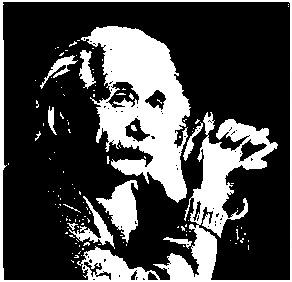

In [68]:
cv2.imwrite("f_OTSU_binary_threshold.jpg",f_binary)
Image(filename='f_OTSU_binary_threshold.jpg')

-------------------------------------------------------------------------------------------------------------------------------

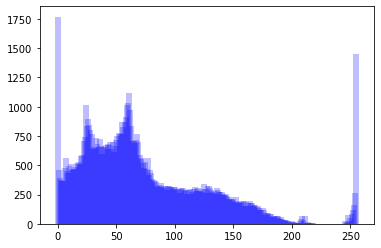

optimal threshold 97


In [69]:
f_truncate = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
K_truncate = f_truncate.max()
x,y = f_truncate.shape
f_truncate_array = np.asarray(f_truncate)
h_truncate = Hist(f_truncate_array)
threshold(h_truncate)
op_thres_truncate = get_optimal_threshold()

for i in range(x):
    for j in range(y):
        if(f_truncate[i][j] > op_thres_truncate):
            f_truncate[i][j] = op_thres_truncate
        else:
            f_truncate[i][j] = f_truncate[i][j]

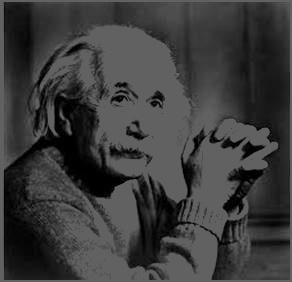

In [70]:
cv2.imwrite("f_OTSU_truncate_threshold.jpg",f_truncate)
Image(filename='f_OTSU_truncate_threshold.jpg')

-------------------------------------------------------------------------------------------------------------------------------

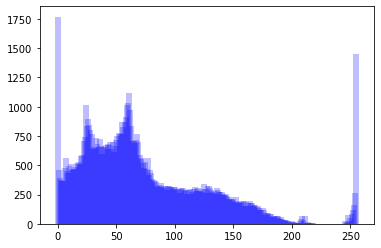

optimal threshold 97


In [71]:
f_tzero = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)
K_tzero = f_tzero.max()
x,y = f_tzero.shape
f_tzero_array = np.asarray(f_tzero)
h_tzero = Hist(f_tzero_array)
threshold(h_tzero)
op_thres_tzero = get_optimal_threshold()

for i in range(x):
    for j in range(y):
        if(f_tzero[i][j] > op_thres_tzero):
            f_tzero[i][j] = f_tzero[i][j]
        else:
            f_tzero[i][j] = 0

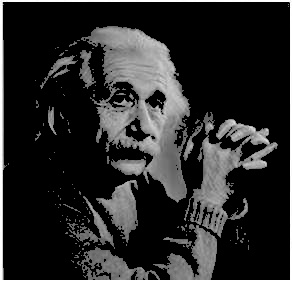

In [72]:
cv2.imwrite("f_OTSU_tozero_threshold.jpg",f_tzero)
Image(filename='f_OTSU_tozero_threshold.jpg')